<a href="https://colab.research.google.com/github/sviteribuben/ML_01/blob/main/jun_ml_7_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 2. Домашнее задание 

### 2.1 Домашнее задание начального уровня

Вычислите евклидово расстояние между кластером *c1* и кластером *c3*. Это расстояние получилось меньше, или больше чем расстояние между кластером *c1* и кластером *c2*?

Координаты центра для трёх кластеров:

* "красный" кластер $c_1 = [1.0, 1.5]$
* "оранжевый" кластер $c_2 = [-1.0, -0.5]$
* "зеленый" кластер $c_3 = [1.0, -0.5]$

![clustering_example](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_example.png)

In [77]:
# -- ВАШ КОД ТУТ --
from scipy.spatial.distance import euclidean

c1 = [1.0, 1.5]
c2 = [-1.0, -0.5]
c3 = [1.0, -0.5]
dist_1_2 = euclidean(c1, c2)
dist_1_3 = euclidean(c1, c3)
f"Расстояние между кластерами c1 и c3 ({dist_1_3}) меньше чем расстояние между \
с1 и с2 ({round(dist_1_2, 2)}) {dist_1_3 < dist_1_2}"



'Расстояние между кластерами c1 и c3 (2.0) меньше чем расстояние между с1 и с2 (2.83) True'

В этом уроке мы познакомились с постановкой задачи кластеризации. Мы узнали, с помощью какой функции можно вычислить расстояние между двумя точками. В следующем уроке мы рассмотрим один из самых простых алгоритмов кластеризации, который назовём алгоритмом $k-$средних.

## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [78]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# -- ВАШ КОД ТУТ --
manual_euclidean_distance = 0 
for i in range(clust.shape[0]):
  manual_euclidean_distance += \
  (centroid[0] - clust[i-1][0]) ** 2 + (centroid[1] - clust[i-1][1]) ** 2

f'расстояние от каждой точки из массива X до центра кластера:\
 {round(manual_euclidean_distance, 3)}'


'расстояние от каждой точки из массива X до центра кластера: 16.312'

### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


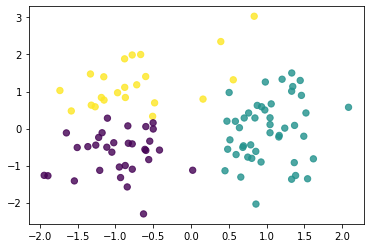

In [79]:
# -- ВАШ КОД ТУТ --
import pickle
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

with open('/content/drive/MyDrive/Colab Notebooks/ML_01/CLUSTERIZATION/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
y = np.array(data_clustering['Y'])

# обучаем. количествo кластеров n=3
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)
# визуализируем.
plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show();

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

In [10]:
from sklearn.metrics.pairwise import euclidean_distances

In [80]:
# -- ВАШ КОД ТУТ --

c = []
for i in range(10):
  kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, \
                        algorithm='full', max_iter=2, n_jobs=-1).fit(X)
  c.append(kmeans_model.cluster_centers_)

c = np.array(c)

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.

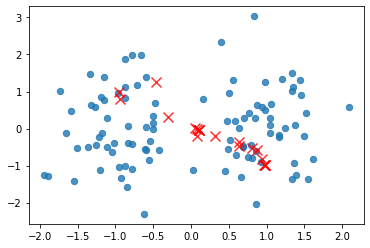

In [81]:
plt.scatter(X[:, 0], X[:, 1], s=40, marker='o', alpha=0.8, label='data')
for i in range(10):
  plt.scatter(c[i][0], c[i][1], s=100, c='red', marker='x', alpha=0.8, label='data', )

plt.show();

## Урок 8. Домашнее задание начального уровня


Обучите модель DBSCAN с параметром *min_samples=8*. Визуализируйте результат.

In [1]:
from sklearn.cluster import DBSCAN

In [82]:
# -- ВАШ КОД ТУТ --

db = DBSCAN(eps=0.6, min_samples=8, n_jobs=-1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
f'{db}'

"DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',\n       metric_params=None, min_samples=8, n_jobs=-1, p=None)"

-------------------------------------------------------------------------------------------------

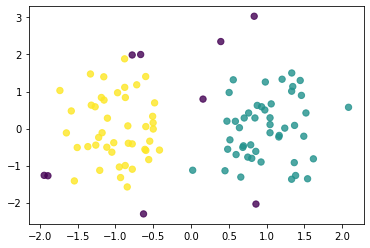

In [83]:
# labels = db.labels_
# labels
plt.scatter(X[:, 0], X[:, 1], s=40, c=db.labels_, marker='o', alpha=0.8, label='data')
plt.show();

Мы теперь мы знаем уже два алгоритма кластеризации -  *k-means* и *DBSCAN*. Как же выяснить, какой алгоритм построил лучшую модель? Для этого надо бы придумать какие-то метрики для кластеризации. О том, как померять качество кластеризации, мы узнаем в следующем уроке

## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [84]:
# -- ВАШ КОД ТУТ --
# Качество кластеризации по метрике силуэтта 0.447 при К=2
from sklearn.metrics import silhouette_score

kmeans_model_S = KMeans(n_clusters=4, random_state=42).fit(X)
score = silhouette_score(X, kmeans_model_S.labels_)
f'Качество кластеризации по метрике Cилуэтта при k=4 {round(score, 4)}'

'Качество кластеризации по метрике Cилуэтта при k=4 0.4418'

***метрика падает, количество кластеров 4 хуже***


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [85]:
# -- ВАШ КОД ТУТ --
# Качество кластеризации по метрике AMI 0.614 при k=2
from sklearn.metrics.cluster import adjusted_mutual_info_score

kmeans_model_AMI = KMeans(n_clusters=4, random_state=42).fit(X)
score = adjusted_mutual_info_score(y, kmeans_model_AMI.labels_,\
                                   average_method='arithmetic')

f'Качество кластеризации по метрике AMI при k=4 {round(score, 4)}'

'Качество кластеризации по метрике AMI при k=4 0.5828'

***качество кластеров снизилось и менне .7. Нужно тюнить)***


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [25]:
import pandas as pd

In [86]:
# -- ВАШ КОД ТУТ --
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_01/CLUSTERIZATION/7.10_clustering_hw.csv')
df.info(),
print('-'*50)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   y       300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB
--------------------------------------------------


,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1


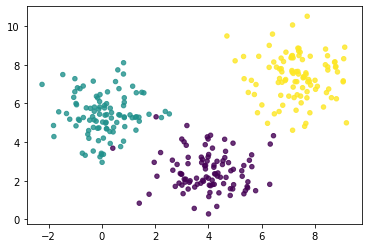

In [119]:
# визуализируем данные
plt.scatter(df.x1.values, df.x2.values, s=20, c=df.y, marker='o',\
            alpha=0.8, label='data')
plt.show();

In [93]:
X = df[['x1', 'x2']].values
y = df.y.values

In [65]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

In [89]:
# Реализуем алгоритм поиска наилучшего количества кластеров
metrics = []
MAX_CLUSTERS = 10
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=42).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
      metric += euclidean_distances(X[labels==centroid_label],\
                                    centroids[centroid_label,:].reshape(1,-1))\
                                    .sum(axis=0)[0]
    print(f"cluster_num {cluster_num}, metric {metric}")
    metrics.append(metric)

cluster_num 1, metric 1105.8973781101083
cluster_num 2, metric 663.5712032768099
cluster_num 3, metric 374.6589714184062
cluster_num 4, metric 347.75283628371415
cluster_num 5, metric 323.6619533289141
cluster_num 6, metric 300.02137264227906
cluster_num 7, metric 282.6149333679352
cluster_num 8, metric 265.73509491034645
cluster_num 9, metric 248.70135596630297


best cluster num: 3


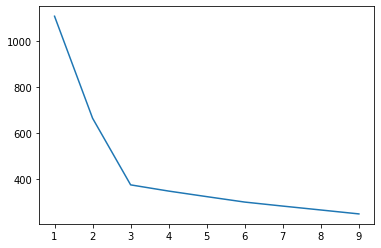

In [90]:
# Визуализируем зависимость метрики от количества кластеров на графике
# и покажем оптимальное количество кластеров
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print(f"best cluster num: {(np.argmin(D)+1)}")

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show();

In [94]:
# обучаем KMeans с количествой кластеров k=3
kmeans_model_goal = KMeans(n_clusters=3, random_state=42).fit(X)
# Качество кластеризации по AMI
score = adjusted_mutual_info_score(y, kmeans_model_goal.labels_,\
                                   average_method='arithmetic')

f'Качество кластеризации по метрике AMI при k=4 {round(score, 4)}'

'Качество кластеризации по метрике AMI при k=4 0.97'

In [121]:
# Прверяем принадлежность к классам
point_1 = np.array([0, 5]).reshape(1, -1)
point_2 = np.array([5, 8]).reshape(1, -1)

f"Кластер первой точки: {kmeans_model_goal.predict(point_1)[0]} \
Кластер второй точки: {kmeans_model_goal.predict(point_2)[0]}"

'Кластер первой точки: 0 Кластер второй точки: 1'

***При достижении третьего кластера график стал пологим. По правилу локтя определяем оптимальное количество кластеров = 3
score AMI = .97 близок к единице, значит качество разделения на кластеры хорошее. Точки принадлежат к разным кластерам*** 

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)